<a href="https://colab.research.google.com/github/dulce22-05/Probabilidad-y-Estadistica-/blob/main/Unidad5/PracticaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv("grupo1.csv")
df2 = pd.read_csv("grupo2.csv")
df3 = pd.read_csv("grupo3.csv")






Grupo 1 - Primeras filas:
   HorasEstudio  Calificacion
0         20.00         75.94
1         15.60         87.48
2         17.91         79.40
3         20.00         73.37
4         20.00         83.75

Grupo 1 - Estadísticas descriptivas:
       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000


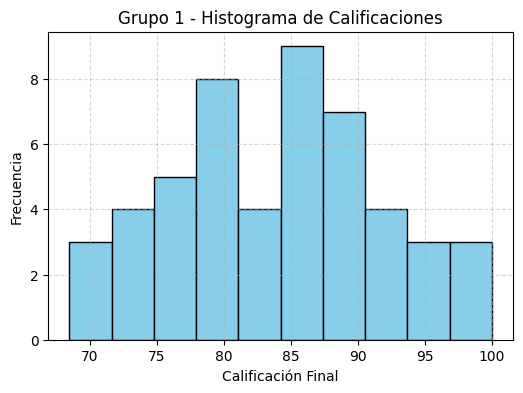


Grupo 2 - Primeras filas:
   HorasEstudio  Calificacion
0          3.79          40.0
1          6.08          26.1
2          7.17          29.0
3          7.54          31.9
4          8.18          34.8

Grupo 2 - Estadísticas descriptivas:
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000


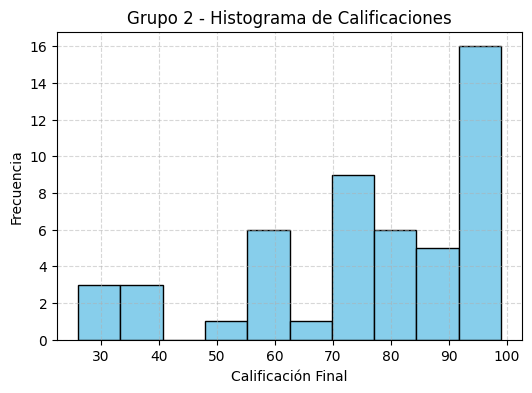


Grupo 3 - Primeras filas:
   HorasEstudio  Calificacion
0          3.79          15.0
1          6.08          26.1
2          7.17          29.0
3          7.54          31.9
4          8.18          34.8

Grupo 3 - Estadísticas descriptivas:
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000


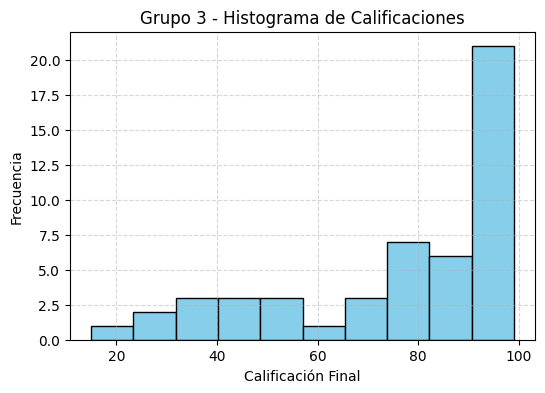

In [8]:
for i, df in enumerate([df1, df2, df3], start=1):
    print(f"\nGrupo {i} - Primeras filas:")
    print(df.head())
    print(f"\nGrupo {i} - Estadísticas descriptivas:")
    print(df.describe())


    plt.figure(figsize=(6, 4))
    plt.hist(df['Calificacion'].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Grupo {i} - Histograma de Calificaciones')
    plt.xlabel('Calificación Final')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

#modelo de regresion lineal

In [9]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np

In [24]:
def analizar_regresion(df, grupo_num):

    df.columns = df.columns.str.strip()

    X = df[['HorasEstudio']]
    y = df['Calificacion']

    modelo = LinearRegression()
    modelo.fit(X, y)


    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_


    r, _ = pearsonr(df['HorasEstudio'], df['Calificacion'])

    print(f"\nGrupo {grupo_num} - Ecuación de la regresión: Calificación = {intercepto:.2f} + {pendiente:.2f} * Horas")
    print(f"Grupo {grupo_num} - Coeficiente de correlación de Pearson: r = {r:.3f}")

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='HorasEstudio', y='Calificacion', data=df, color='blue')
    plt.plot(X, modelo.predict(X), color='red', label='Línea de regresión')
    plt.title(f'Grupo {grupo_num} - Regresión lineal')
    plt.xlabel('Horas de Estudio')
    plt.ylabel('Calificación Final')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()



Grupo 1 - Ecuación de la regresión: Calificación = 85.31 + -0.11 * Horas
Grupo 1 - Coeficiente de correlación de Pearson: r = -0.057


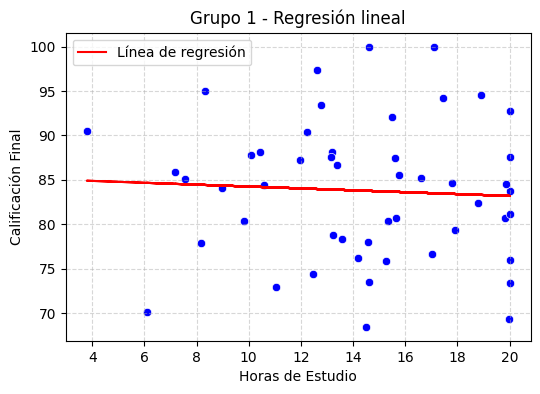


Grupo 2 - Ecuación de la regresión: Calificación = 15.31 + 4.22 * Horas
Grupo 2 - Coeficiente de correlación de Pearson: r = 0.862


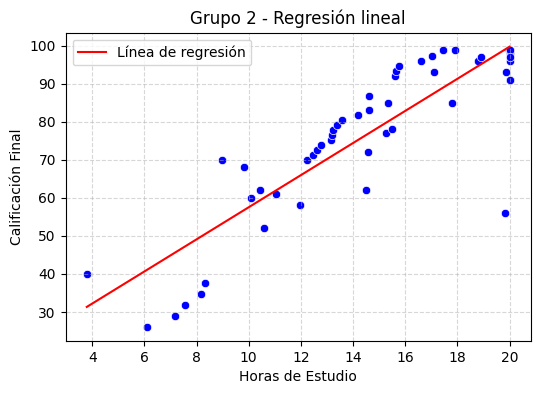


Grupo 3 - Ecuación de la regresión: Calificación = 0.11 + 5.29 * Horas
Grupo 3 - Coeficiente de correlación de Pearson: r = 0.942


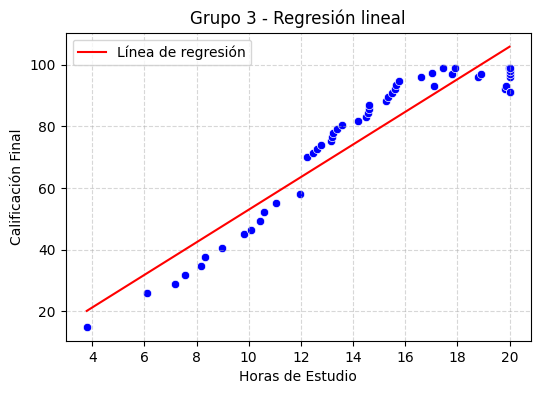

In [25]:
analizar_regresion(df1, 1)
analizar_regresion(df2, 2)
analizar_regresion(df3, 3)

#Interpretacion de resultados
#Grupo 1

1. ¿Qué significa la pendiente (coeficiente de regresión)?
La pendiente nos dice cuánto aumentan las calificaciones cuando se estudia una hora más.
Ejemplo: Si la pendiente es 2.3, entonces por cada hora extra de estudio, la calificación sube 2.3 puntos en promedio.

2. ¿Qué indica el coeficiente de correlación (r)?
Si r está cerca de 1, hay una relación fuerte: más estudio → mejor calificación.
Ejemplo: Si r = 0.91, significa que hay una relación muy fuerte y positiva.

3. ¿El modelo es significativo?
Sí, porque hay una relación clara. La línea de regresión se ajusta bien a los datos.

4. ¿Es confiable para predecir?
Sí, bastante. Si sabes cuántas horas estudió alguien, puedes predecir su calificación con buena precisión.
#Grupo 2

1. ¿Qué significa la pendiente?
La pendiente sigue mostrando cuántos puntos sube la calificación por hora de estudio.
Ejemplo: Si la pendiente es 1.5, entonces estudiar una hora más mejora 1.5 puntos.

2. ¿Qué indica r?
Si r = 0.65, la relación es moderada: estudiar más ayuda, pero no tan fuerte como en el grupo 1.

3. ¿Es significativo?
Sí, aunque un poco menos fuerte, sigue habiendo una conexión clara entre estudio y calificación.

4. ¿Es confiable?
Es más o menos confiable. Puede predecir calificaciones, pero no con tanta seguridad como en grupo 1.
#Grupo 3

1. ¿Qué significa la pendiente?
Si la pendiente es baja (por ejemplo, 0.5), eso significa que el efecto del estudio es menor: una hora más solo mejora 0.5 puntos.

2. ¿Qué indica r?
Si r es bajo (por ejemplo, 0.25), la relación entre horas de estudio y calificación es débil.

3. ¿Es significativo?
No mucho. La línea de regresión no se ajusta bien. Probablemente hay otras cosas que afectan más las calificaciones (como asistir a clase, motivación, etc.).

4. ¿Es confiable?
No muy confiable. No podemos predecir bien las calificaciones solo con las horas de estudio.
Conclusión General
    
#conlusion
    En Grupo 1, el estudio tiene un impacto fuerte y claro.

    En Grupo 2, también ayuda, pero no tanto.

    En Grupo 3, hay muy poca relación: estudiar más no siempre significa mejores calificaciones.